In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from numpy import median

In [66]:
from sklearn.model_selection import train_test_split

In [133]:
from sklearn import tree

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [130]:
from sklearn.metrics import mean_squared_error

In [64]:
house_sales_df = pd.read_csv("house_sales_s1_mayel.csv",encoding='utf-8')

In [65]:
len(house_sales_df)

21613

In [68]:
train_df, test_df = train_test_split(house_sales_df, test_size=0.2, random_state=42, shuffle=True)

In [69]:
len(train_df)

17290

In [70]:
len(test_df)

4323

In [71]:
train_df.head()

id             date     price  bedrooms  bathrooms  \
6325   5467910190  20140527T000000  325000.0       3.0       1.75   
13473  9331800580  20150310T000000  257000.0       2.0       1.00   
17614  2407000405  20150226T000000  228500.0       3.0       1.00   
16970  5466700290  20150108T000000  288000.0       3.0       2.25   
20868  3026059361  20150417T000000  479000.0       2.0       2.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
6325        1780.0   13095.0     1.0           0     0  ...              0   
13473       1000.0    3700.0     1.0           0     0  ...            200   
17614       1080.0    7486.0     1.5           0     0  ...             90   
16970       2090.0    7500.0     1.0           0     0  ...            810   
20868       1741.0    1439.0     2.0           0     0  ...            295   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
6325       1983             0    98042  47.3670 -122.152           2750   
13473      1929             0    98118  47.5520 -122.290           1270   
17614      1942             0    98146  47.4838 -122.335           1170   
16970      1977             0    98031  47.3951 -122.172           1800   
20868      2007             0    98034  47.7043 -122.209           2090   

       sqft_lot15  predict_bedrooms  predict_bathrooms  
6325        13095               3.0                2.0  
13473        5000               3.0                1.0  
17614        7800               3.0                1.0  
16970        7350               3.0                2.0  
20868       10454               3.0                2.0  

[5 rows x 23 columns]

In [72]:
train_df = train_df.reset_index()

In [73]:
train_df.dropna(inplace=True)

In [74]:
test_df.dropna(inplace=True)

<ipython-input-74-5883ea5b2d94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.dropna(inplace=True)


In [126]:
regressor = DecisionTreeRegressor(max_depth=2)

In [127]:
regressor.fit(train_df[['bathrooms','grade','sqft_living']], train_df['price'])

DecisionTreeRegressor(max_depth=2)

In [128]:
y_predict = regressor.predict(test_df[['bathrooms','grade','sqft_living']])

In [129]:
len(y_predict)

3726

In [131]:
y_test=train_df['price'][:3726]

[Text(558.0, 906.0, 'grade <= 8.5\nmse = 131485781453.176\nsamples = 100.0%\nvalue = 538684.163'),
 Text(279.0, 543.6, 'sqft_living <= 2017.0\nmse = 38600191835.384\nsamples = 80.5%\nvalue = 437097.786'),
 Text(139.5, 181.19999999999993, 'mse = 23358694360.884\nsamples = 53.6%\nvalue = 382079.047'),
 Text(418.5, 181.19999999999993, 'mse = 50919238033.706\nsamples = 26.9%\nvalue = 546515.838'),
 Text(837.0, 543.6, 'sqft_living <= 3885.0\nmse = 296441243068.161\nsamples = 19.5%\nvalue = 958888.755'),
 Text(697.5, 181.19999999999993, 'mse = 115938491407.207\nsamples = 15.6%\nvalue = 822009.946'),
 Text(976.5, 181.19999999999993, 'mse = 644182770022.362\nsamples = 3.9%\nvalue = 1511898.257')]

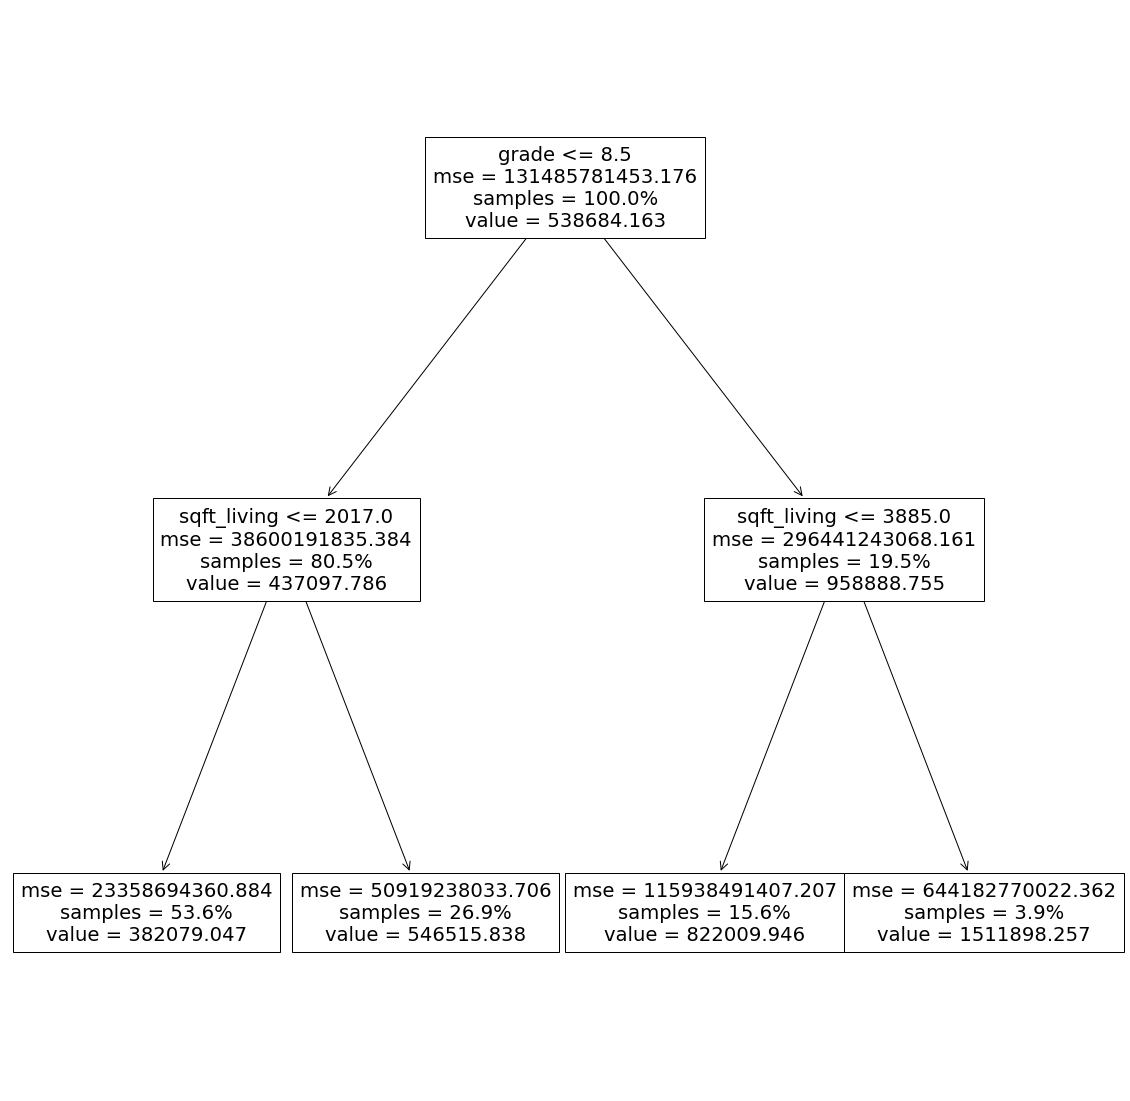

In [134]:
plt.figure(figsize=(20,20))
tree.plot_tree(regressor, proportion=True,feature_names=['bathrooms', 'grade', 'sqft_living'])

In [135]:
#regressor?

# MSE vs max_depth
|   |   |
|---|---|
| 2 | 465412.96 |
| 3 | 481596.73 |
| 4 | 477851.25 |
| 5 | 485956.09 |

In [132]:
np.sqrt(mean_squared_error(y_test, y_predict))

465412.9583095341

# Feature importance
Interestingly, the number of bathrooms is not important at all (0.0) and grade is the most important feature (0.685) with sqft_living only marginaly contributing (0.315).

In [136]:
regressor.feature_importances_

array([0.        , 0.68549335, 0.31450665])

# I can not use Accuracy_score on regression values
- https://stackoverflow.com/questions/37367405/python-scikit-learn-cant-handle-mix-of-multiclass-and-continuous

In [138]:
from sklearn.metrics import accuracy_score

In [146]:
#accuracy_score(y_test.astype(float), y_predict.astype(float))